Лабораторная работа №4. Выполнил Полыгалов Богдан

Задание:
* Разработать программу (Python, C# или др.) для оценки тональности отзывов о 5 фильмах, оставленных пользователями на сайтах https://www.imdb.com/ или https://www.kinopoisk.ru/lists/movies/top250/. Выбрать и обосновать инструментальное средство (библиотеку). (4-6 баллов)
* Текст отзывов получен с помощью технологии web-скрапинга или Web API. (+2 балл)
* Выполнить анализ полученных результатов. Оценить зависимость указанного пользователем рейтинга от тональности отзыва. Рассчитать статистики, построить иллюстрирующие графики. (+1-2 балла)

# Установки библиотек

In [1]:
pip install textblob

In [2]:
pip install kinopoisk-dev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


# Получение и обработка данных

Для получения отзывов использовал [API кинопоиска](https://kinopoisk.dev/) и [библиотеку](https://github.com/odi1n/kinopoisk_dev), работающую с ней.

Использовал библиотеку для оценки тональности TextBlob, потому что она простая в использовании и поддерживает русский язык.

Для английского языка можно было бы использовать VADER, так как понимает сленг.


In [3]:
from kinopoisk_dev import KinopoiskDev, ReviewParams, ReviewField
from textblob import TextBlob
import time

# Нужно вставить свой токен
kp = KinopoiskDev(token='token')

# Получим все отзывы для каждого из фильмов, у каждого фильма меньше 600 отзывов, на 1 странице API выдаёт 250 отзывов максимум
movies = {
    'Зелёная миля': 435,
    'Побег из Шоушенка': 326,
    'Форрест Гамп': 448,
    '1+1': 535341,
    'Список Шиндлера': 329,
}

results = {}

for movie, movie_id in movies.items():

    # Создадим список для хранения результатов текущего фильма
    movie_results = []

    for page in range(1, 4):  # Проходим по страницам от 1 до 3 включительно

        # Запрос отзывов для текущей страницы
        item = kp.review(params=[
            ReviewParams(keys=ReviewField.PAGE, value=page),
            ReviewParams(keys=ReviewField.LIMIT, value=250),
            ReviewParams(keys=ReviewField.MOVIE_ID, value=movie_id)
        ])
        time.sleep(1)

        # Если нет отзывов, выходим из цикла
        if not item.docs:
            break

        for review in item.docs:
            title = review.title
            author = review.author
            user_grade = review.type
            review_text = cleaned_text = '\n'.join(line for line in review.review.split('\n') if line.strip())

            # Анализ тональности с использованием TextBlob
            blob = TextBlob(review_text)
            sentiment_score_textBlob = round(blob.sentiment.polarity, 0)


            # Сохраняем результаты для текущего отзыва
            result = {
                'Title': title,
                'Author': author,
                'User Grade': user_grade,
                'Review': review_text,
                'Sentiment Score': sentiment_score_textBlob,
            }

            movie_results.append(result)

    # Сохраняем результаты текущего фильма в общий словарь
    results[movie] = movie_results

# Просмотр и анализ данных

In [4]:
# Менять название фильма и условие со score
for reviewModel in results['1+1']:
    sentiment_score = reviewModel['Sentiment Score']
    if sentiment_score > 0:
      print(f"\n\n\nПользователь отметил свой комментарий как: {reviewModel['User Grade']}")
      print(f"\nТональность: {sentiment_score}")
      print(f"\n{reviewModel['Review']}")




Пользователь отметил свой комментарий как: Позитивный

Тональность: 1.0

Удивительный фильм. Даже после просмотра невозможно связать слова в предложения, настолько фильм чудесен. Это великолепный рассказ о двух верных друзьях, вроде бы, таких разных. 
Франсуа Клюзе сыграл инвалида, который потерял смысл жизни. Он считал, что раз уж он инвалид, то он уже не существует в мире. Он не мог ничего делать, и возможно, в какой-то степени, он нанимал сиделок не только ради того, чтобы за ним ухаживали, но и ради того, чтобы ему морально помогли. Ведь его дни проходили одинаково. Разбор писем, написание писем своей возлюбленной, которой он даже не мог позвонить. Наверно, до появления Дрисса, ему не хотелось даже жить. 
Омар Сай сыграл прекрасного человека по имени Дрисс. Именно Дрисс научил Филиппа смотреть на мир другими глазами. Глазами оптимистичного человека, который даже в инвалидном кресле может надеется на лучшее. Он, на фоне чопорных богачей, смотрелся правдиво. Он был настоящим, без 

In [5]:
# Менять название фильма и условие со score
for reviewModel in results['1+1']:
    sentiment_score = reviewModel['Sentiment Score']
    if sentiment_score < 0:
      print(f"\n\n\nПользователь отметил свой комментарий как: {reviewModel['User Grade']}")
      print(f"\nТональность: {sentiment_score}")
      print(f"\n{reviewModel['Review']}")




Пользователь отметил свой комментарий как: Позитивный

Тональность: -1.0

Не скажу, что я обожаю французское кино, но до сих не имела ничего против. Всегда в них есть что-то — какая-то ирония, скромная шутка… но ни один французский фильм не мог одновременно растрогать меня до слез и заставить смеяться в голос. А после этого фильма мне до сих пор хочется смеяться) А еще полтора часа назад мир казался…
Как и многие, я нашла его случайно. И довольно долго все никак не могла решиться посмотреть — очень не хотелось разочароваться. Зря я боялась! Этот чудный фильм с первых кадров попал в разряд моих самых любимых. Я процитирую предыдущего автора, но, надеюсь, он меня простит: (фильм)' напоминает очень складно и эмоционально рассказанную трагикомедию. Рассказчик настолько хорош и любит свою работу, что от его слов сложно оторваться, забывая на время о времени. «
Когда режиссер еще не зациклен на своей гениальности, актеры свежи, а сюжет взят из жизни и рассказывает о маленьком чуде, и музы

**Анализ:** хоть отзыв и положительный, но используются слова с отрицательной окраской -> в нашем исследовании является выбросом

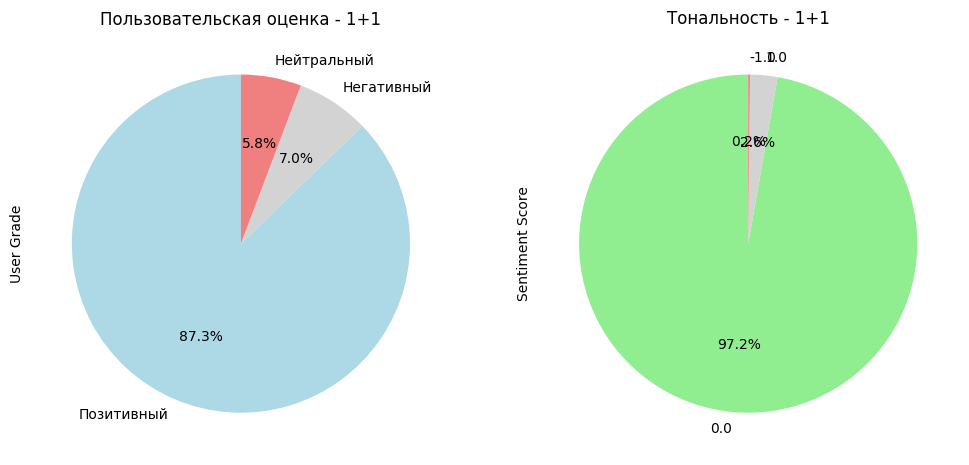

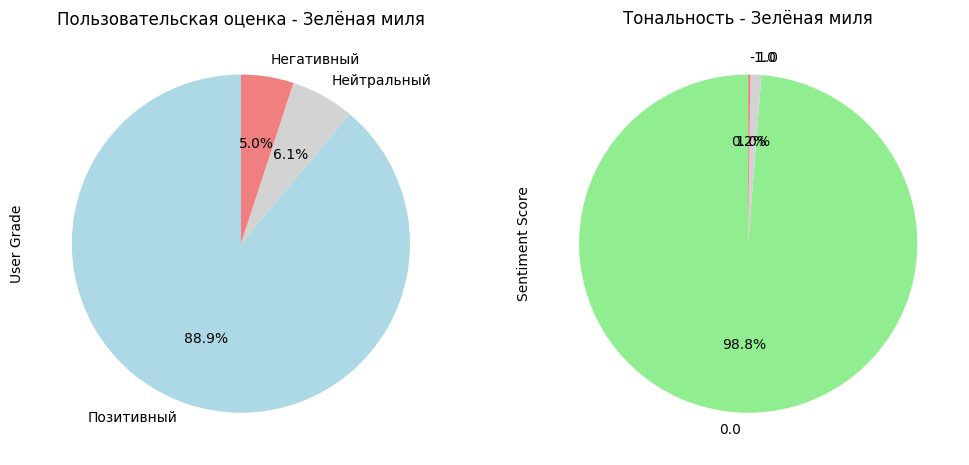

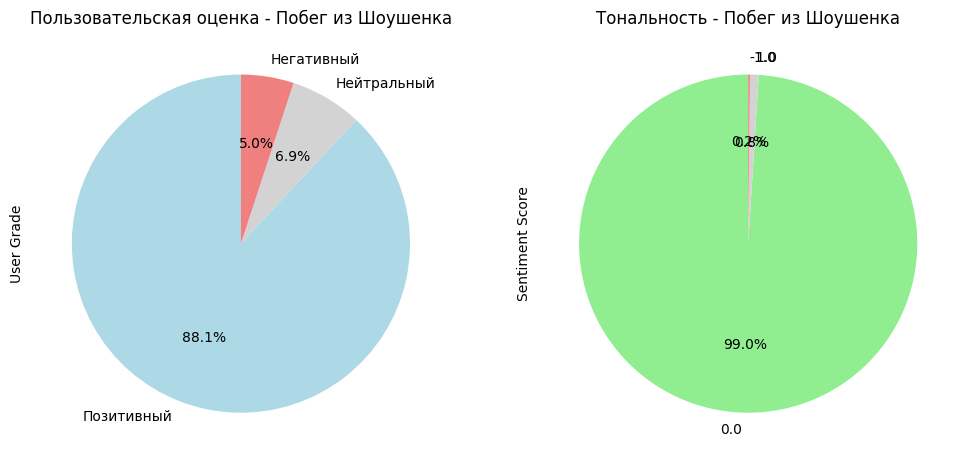

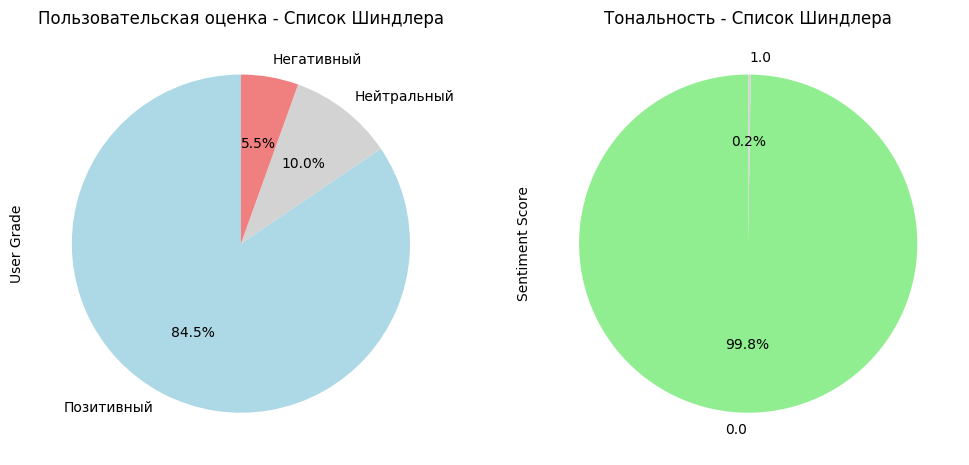

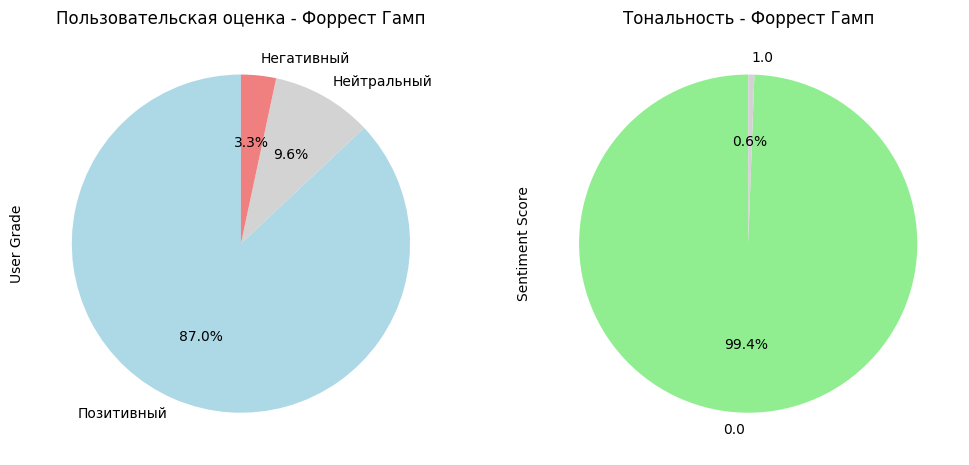

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Преобразование результатов в DataFrame
data = []
for movie, movie_results in results.items():
    for result in movie_results:
        data.append({
            'Movie': movie,
            'User Grade': result['User Grade'],
            'Sentiment Score': result['Sentiment Score'],
        })

df = pd.DataFrame(data)

# Построение круговых диаграмм
for movie, movie_df in df.groupby('Movie'):
    plt.figure(figsize=(12, 6))

    # Круговая диаграмма для User Rating
    plt.subplot(1, 2, 1)
    movie_df['User Grade'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgrey', 'lightcoral'])
    plt.title(f'Пользовательская оценка - {movie}')

    # Круговая диаграмма для Sentiment Score
    plt.subplot(1, 2, 2)
    movie_df['Sentiment Score'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey', 'lightcoral'])
    plt.title(f'Тональность - {movie}')

    plt.show()

**Вывод:** оценка тональности рассходится с оценками пользователей, это может быть из-за следующих причин:
* Пользователи не сильно используют характерные эмоционально окрашенные слова, из-за чего комментарий определяется как нейтральный
* Оценка, которую ставят пользователи, не является их истинным мнением, например пользователь поставил отрицательную отметку, хоть фильм и понравился, чтобы его комментарий увидело больше людей